In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
%matplotlib inline

In [53]:
import os
os.chdir("..")

In [54]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("./src")
import data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


----

In [55]:
EXP_CONDITIONS = ["verb", "syntax"]

In [56]:
trials_df = data.get_trials_df(data.load_raw_results(),
                               extract_data_fields=("condition", "item_idx", 
                                                    "verbs", "nonce_verbs",
                                                    "verb_sequence", "nonce_verb_sequence"))

# Extract train--test sequences
trials_df["is_train_trial"] = False
trials_df["is_test_trial"] = False
trials_df["chunk"] = None
# TODO mark training and test trials more explicitly next time ..
train_trial_idxs, test_trial_idxs = [], []
train_chunks, test_chunks = [], []
for uid, subj_trials in trials_df.groupby("uniqueid"):
    chunk = -1
    for trial_index, trial in subj_trials.sort_index().iterrows():
        if trial.trial_type == "instructions" and trial.condition in EXP_CONDITIONS:
            # New chunk.
            chunk += 1
        elif trial.trial_type == "html-keyboard-response" or trial.trial_type == "delayed-html-keyboard-response":
            # Training trial.
            trials_df.loc[trial_index, ["is_train_trial", "chunk"]] = True, chunk
        elif trial.trial_type == "survey-multi-choice" and chunk >= 0:
            trials_df.loc[trial_index, ["is_test_trial", "chunk"]] = True, chunk
            
# TODO don't know what's happening here
trials_df = trials_df.drop(["A35UT5CBNL7FTD:3ZV9H2YQQEVPYWQVPCODFUY5Y8Z3WO"], level="uniqueid")

train_trials_df = trials_df[trials_df.is_train_trial]
test_trials_df = trials_df[trials_df.is_test_trial]
len(train_trials_df), len(test_trials_df)

Missing datastring for uid AW2TBYJM32KBE:32SVAV9L3GXSRJNSO7SLX51E5SCA35. Status was 1.
Missing datastring for uid A1FNNL4YJGBU8U:3JC6VJ2SAC7V5YAW2QGEC2ZYJO3A5V. Status was 1.
Missing datastring for uid A2VNSNAN1LZBAM:3M81GAB8A17PHUYMSW4D5OEVX83BQ8. Status was 1.
Missing datastring for uid A2SM1GBN4ARGM4:3X1FV8S5JYFDDJ2EUHQ1CM40UDAGVO. Status was 1.
Missing datastring for uid AOS2PVHT2HYTL:3R6BYFZZP80Z38BEJCL1IM1999JFXS. Status was 1.
Missing datastring for uid A3EYLQU2ORNJ7K:3R6BYFZZP80Z38BEJCL1IM1999JFXS. Status was 1.
Missing datastring for uid ACTBJYB46CJO3:3R6BYFZZP80Z38BEJCL1IM1999JFXS. Status was 1.
Missing datastring for uid debugJE81TE:debugICM3V5. Status was 1.
Missing datastring for uid AY832D29HUURG:3EJJQNKU9STZK8G85339WPRYON8RHZ. Status was 1.
Missing datastring for uid A36DK84J5YJ942:3M81GAB8A17PHUYMSW4D5OEVXO1BQ2. Status was 1.
Missing datastring for uid A1SIUJEL2LS8UO:3ZAK8W07I52GP02TBPRTV8F195AU04. Status was 1.
Missing datastring for uid ABOEYY9Y0PFRI:3ERMJ6L4DZGBU3X4N

(690, 690)

In [57]:
train_trials_df.head(10)

,,condition,counterbalance,assignmentId,workerId,hitId,trial_type,rt,internal_node_id,item_idx,verbs,nonce_verbs,verb_sequence,nonce_verb_sequence,survey_question_idx,survey_answer,is_train_trial,is_test_trial,chunk
trial_index,uniqueid,,,,,,,,,,,,,,,,,,
4,A1YFVXP4A1CXSF:3OJSZ2ATDTKDMWCYVN4U2BX8IGX57Z,verb,0,3OJSZ2ATDTKDMWCYVN4U2BX8IGX57Z,A1YFVXP4A1CXSF,3VJ4PFXFJ3V93T2IDPJKWUVQ3Y8UAY,html-keyboard-response,13184,0.0-3.0-1.0,3.0,"[clean, wear]","[dax, blick]",None,None,NaN,NaN,True,False,0
5,A1YFVXP4A1CXSF:3OJSZ2ATDTKDMWCYVN4U2BX8IGX57Z,verb,0,3OJSZ2ATDTKDMWCYVN4U2BX8IGX57Z,A1YFVXP4A1CXSF,3VJ4PFXFJ3V93T2IDPJKWUVQ3Y8UAY,html-keyboard-response,6731,0.0-3.0-2.0,3.0,"[clean, wear]","[dax, blick]",None,None,NaN,NaN,True,False,0
8,A1YFVXP4A1CXSF:3OJSZ2ATDTKDMWCYVN4U2BX8IGX57Z,verb,0,3OJSZ2ATDTKDMWCYVN4U2BX8IGX57Z,A1YFVXP4A1CXSF,3VJ4PFXFJ3V93T2IDPJKWUVQ3Y8UAY,html-keyboard-response,2529,0.0-4.0-1.0,14.0,"[fly, float]","[cluss, cluft]",None,None,NaN,NaN,True,False,1
9,A1YFVXP4A1CXSF:3OJSZ2ATDTKDMWCYVN4U2BX8IGX57Z,verb,0,3OJSZ2ATDTKDMWCYVN4U2BX8IGX57Z,A1YFVXP4A1CXSF,3VJ4PFXFJ3V93T2IDPJKWUVQ3Y8UAY,html-keyboard-response,3373,0.0-4.0-2.0,14.0,"[fly, float]","[cluss, cluft]",None,None,NaN,NaN,True,False,1
12,A1YFVXP4A1CXSF:3OJSZ2ATDTKDMWCYVN4U2BX8IGX57Z,verb,0,3OJSZ2ATDTKDMWCYVN4U2BX8IGX57Z,A1YFVXP4A1CXSF,3VJ4PFXFJ3V93T2IDPJKWUVQ3Y8UAY,html-keyboard-response,2169,0.0-5.0-1.0,15.0,"[jump, play]","[shramp, snoss]",None,None,NaN,NaN,True,False,2
13,A1YFVXP4A1CXSF:3OJSZ2ATDTKDMWCYVN4U2BX8IGX57Z,verb,0,3OJSZ2ATDTKDMWCYVN4U2BX8IGX57Z,A1YFVXP4A1CXSF,3VJ4PFXFJ3V93T2IDPJKWUVQ3Y8UAY,html-keyboard-response,1124,0.0-5.0-2.0,15.0,"[jump, play]","[shramp, snoss]",None,None,NaN,NaN,True,False,2
4,A2SYTRKH1JWJO5:35K3O9HUAC1QX8KXO7V9UXG2TXFEFD,verb,0,35K3O9HUAC1QX8KXO7V9UXG2TXFEFD,A2SYTRKH1JWJO5,3VJ4PFXFJ3V93T2IDPJKWUVQ3Y8UAY,html-keyboard-response,17567,0.0-3.0-1.0,1.0,"[pull, arrive]","[spen, mund]",None,None,NaN,NaN,True,False,0
5,A2SYTRKH1JWJO5:35K3O9HUAC1QX8KXO7V9UXG2TXFEFD,verb,0,35K3O9HUAC1QX8KXO7V9UXG2TXFEFD,A2SYTRKH1JWJO5,3VJ4PFXFJ3V93T2IDPJKWUVQ3Y8UAY,html-keyboard-response,2408,0.0-3.0-2.0,1.0,"[arrive, pull]","[mund, spen]",None,None,NaN,NaN,True,False,0
8,A2SYTRKH1JWJO5:35K3O9HUAC1QX8KXO7V9UXG2TXFEFD,syntax,0,35K3O9HUAC1QX8KXO7V9UXG2TXFEFD,A2SYTRKH1JWJO5,3VJ4PFXFJ3V93T2IDPJKWUVQ3Y8UAY,html-keyboard-response,5262,0.0-4.0-1.0,15.0,"[jump, play]","[clouse, twan]",None,None,NaN,NaN,True,False,1


In [58]:
# Compute the number of training trials per chunk
chunk_train_sizes = train_trials_df.chunk.value_counts().unique()
assert len(chunk_train_sizes) == 1, "Some chunks are different sizes than others -- huh?\n" + str(train_trials_df.chunk.value_counts())
TRAIN_TRIALS_PER_CHUNK = chunk_train_sizes[0]

In [59]:
train_trials_df.to_csv("data/train_results.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/train_results.csv'

-----

## Demographic analysis

Text(0.5, 0, 'Age')

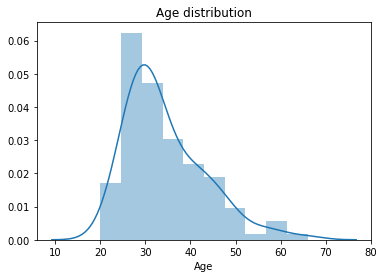

In [60]:
ages = pd.to_numeric(trials_df.loc[1].survey_answer, errors="coerce")

sns.distplot(ages)
plt.title("Age distribution")
plt.xlabel("Age")

In [61]:
trials_df.loc[2].groupby("survey_question_idx").survey_answer.value_counts()

survey_question_idx  survey_answer    
0                    Bachelor's degree     58
                     Some college          31
                     High school/GED       14
                     Master's degree       11
                     Ph.D.                  1
1                    Yes                  114
                     No                     1
Name: survey_answer, dtype: int64

### Comments

In [62]:
trials_df.loc[15].survey_answer.unique()

array(['', 'no', 'nice', 'no comments', 'nope', 'Thank you', 'good',
       'No Comments ', 'very interesting ', 'Good task', 'GOOD',
       'good task', 'it was fast', 'none', 'nice and good',
       'it is very intresting survey', 'No', 'good survey',
       'Fun experiment', '6 minute timer is very bad',
       'it was good to complete this study', 'Thanks', 'Thank you!',
       'No comments', 'very nice', 'no issues encountered',
       '6 minute timer for the entire survey thus not much time to think ',
       'time too short - if you want good effort, Hit time needs to be longer',
       'good idea ', 'nice experiment', 'it was very interesting'],
      dtype=object)

## Reaction time analyses

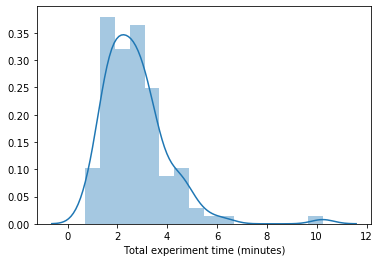

In [63]:
sns.distplot(trials_df.groupby("uniqueid").rt.sum() / 1000 / 60, axlabel="Total experiment time (minutes)")

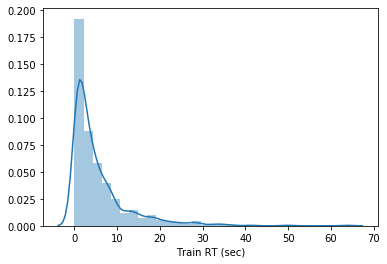

In [64]:
sns.distplot(train_trials_df.rt / 1000, bins=30, axlabel="Train RT (sec)")

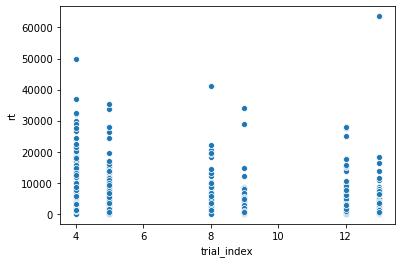

In [65]:
sns.scatterplot(data=train_trials_df.reset_index(), x="trial_index", y="rt")

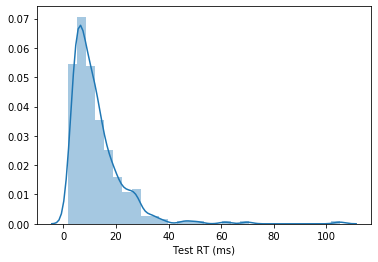

In [66]:
sns.distplot(test_trials_df.rt / 1000, bins=30, axlabel="Test RT (ms)")

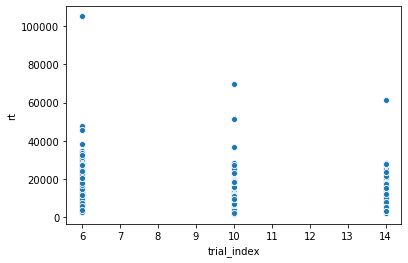

In [67]:
sns.scatterplot(data=test_trials_df.reset_index(), x="trial_index", y="rt")

## Coarse accuracy analyses

In [68]:
test_trials_df["verb_query"] = test_trials_df.apply(lambda row: row.verb_sequence[row.survey_question_idx], axis=1)
test_trials_df["nonce_verb_query"] = test_trials_df.apply(lambda row: row.nonce_verb_sequence[row.survey_question_idx], axis=1)
test_trials_df["correct"] = test_trials_df.verb_query == test_trials_df.survey_answer

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [69]:
test_trials_df.to_csv("data/test_results.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/test_results.csv'

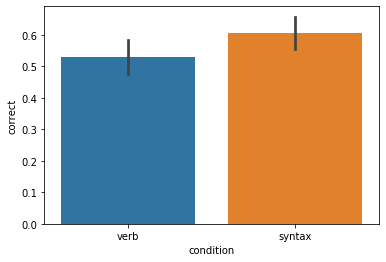

In [70]:
sns.barplot(data=test_trials_df.reset_index(),
            x="condition", y="correct")

In [71]:
test_trials_df.groupby("condition").correct.mean()

condition
syntax    0.606952
verb      0.528481
Name: correct, dtype: float64

In [72]:
test_trials_df.groupby(["item_idx", "condition"]).correct.mean()

item_idx  condition
1.0       syntax       0.538462
          verb         0.500000
2.0       syntax       0.812500
          verb         0.461538
3.0       syntax       0.615385
          verb         0.333333
4.0       syntax       0.700000
          verb         0.625000
5.0       syntax       0.750000
          verb         0.600000
6.0       syntax       0.200000
          verb         0.800000
8.0       syntax       0.714286
          verb         0.285714
9.0       syntax       0.625000
          verb         0.800000
10.0      syntax       0.428571
          verb         0.500000
11.0      syntax       0.884615
          verb         0.416667
12.0      syntax       0.466667
          verb         0.444444
13.0      syntax       0.777778
          verb         0.714286
14.0      syntax       0.578947
          verb         0.428571
15.0      syntax       0.472222
          verb         1.000000
16.0      syntax       0.750000
          verb         0.692308
17.0      syntax    

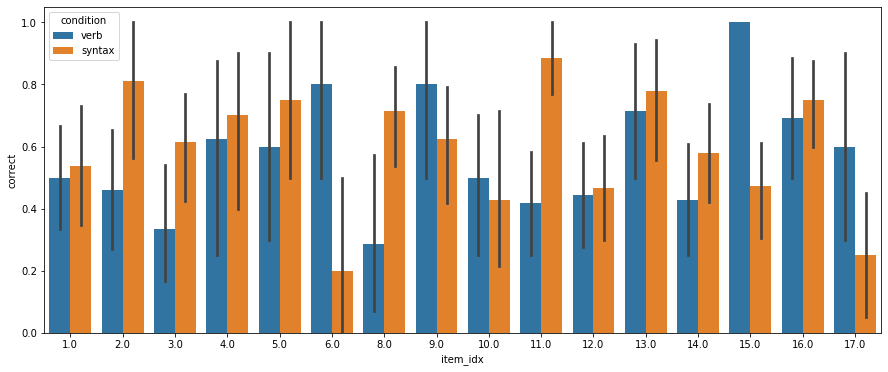

In [73]:
plt.subplots(figsize=(15, 6))
sns.barplot(data=test_trials_df, x="item_idx", hue="condition", y="correct")

Text(0.5, 1.0, 'Total chunk time vs. chunk accuracy')

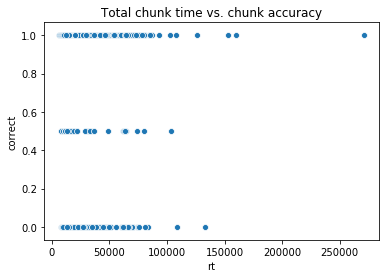

In [74]:
chunk_perf = pd.concat([trials_df.groupby(["uniqueid", "chunk"]).rt.sum(),
                        test_trials_df.groupby(["uniqueid", "chunk"]).correct.mean()],
                       axis=1)

sns.scatterplot(data=chunk_perf, x="rt", y="correct")
plt.title("Total chunk time vs. chunk accuracy")